In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from colour import Color

In [3]:
def open_npy(filepath):
    with open(filepath, 'rb') as file:
        return np.load(file)

def rainbow_color_stops(n=10, end=2/4):
    return [ hls_to_rgb(end * i/(n-1), 0.5, 1) for i in range(n) ]

In [4]:
acprop_train_loss = open_npy('./train_losses_grid_ACProp.npy') 
acprop_test_loss = open_npy('./test_losses_grid_ACProp.npy') 

adabelief_train_loss = open_npy('./train_losses_grid_AdaBelief.npy') 
adabelief_test_loss = open_npy('./test_losses_grid_AdaBelief.npy') 

In [5]:
learning_rate_grid = open_npy('./learning_rate_grid.npy')

In [6]:
learning_rate_grid

array([1.e-06, 5.e-06, 1.e-05, 5.e-05, 1.e-04, 5.e-04, 1.e-03, 5.e-03,
       1.e-02, 5.e-02, 1.e-01, 1.e+00])

In [7]:
adabelief_train_loss.shape, acprop_train_loss.shape

((12, 50), (12, 50))

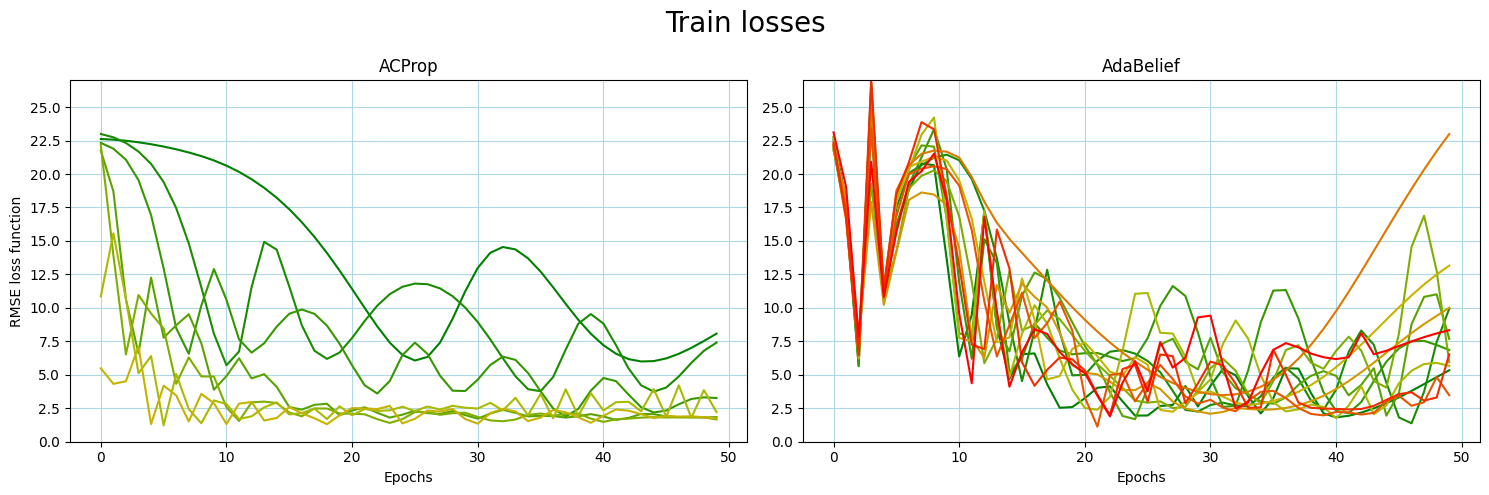

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

gradient = Color("green")
colors = list(gradient.range_to(Color("red"), adabelief_train_loss.shape[0]))
colors = [color.rgb for color in colors]

for array, color, lr in zip(acprop_train_loss, colors, learning_rate_grid):
    axes[0].plot(array, color=color, label=f'learning rate={lr}')
    axes[0].set_title('ACProp')
    axes[0].set_ylabel('RMSE loss function')
    axes[0].set_xlabel('Epochs')
    
for array, color in zip(adabelief_train_loss, colors):
    axes[1].set_title('AdaBelief')
    axes[1].plot(array, color=color)
    axes[1].set_xlabel('Epochs')
    
for ax in axes:
    ax.set_yticks(np.arange(0, 100, 2.5))
    ax.set_ylim(0, 27)
    ax.grid(color='lightblue')
    
# axes[0].legend(ncols=4, bbox_to_anchor=(1.8, -0.15))
fig.suptitle('Train losses', fontsize=20)
fig.tight_layout()
fig.savefig('images/train_losses.png', dpi=300)


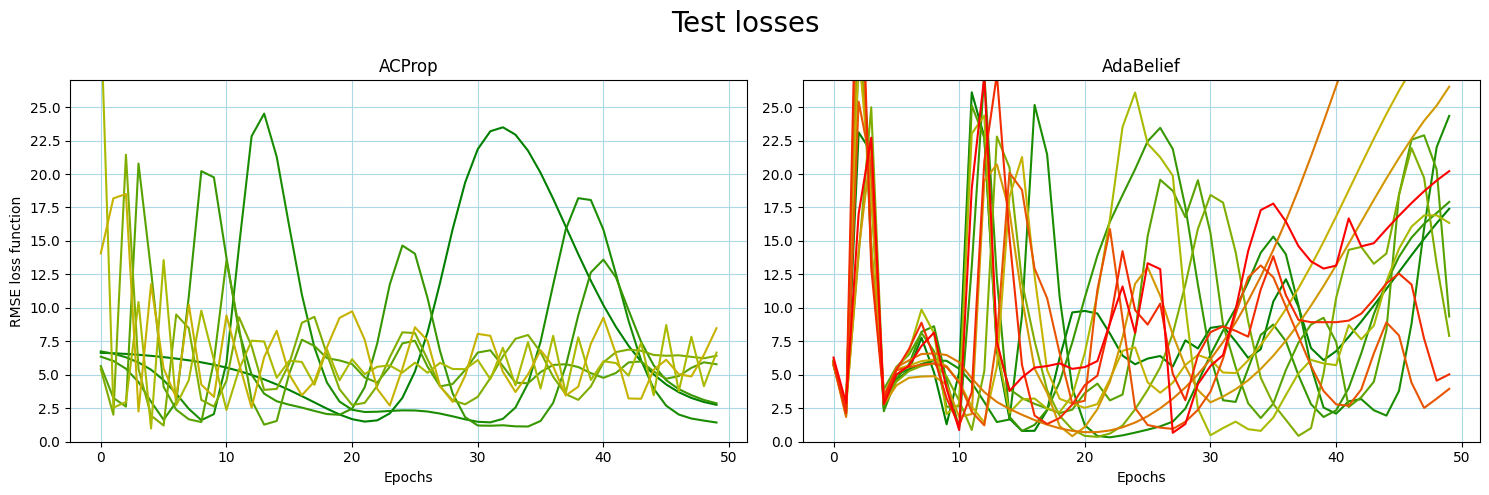

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

gradient = Color("green")
colors = list(gradient.range_to(Color("red"), adabelief_train_loss.shape[0]))
colors = [color.rgb for color in colors]

for array, color, lr in zip(acprop_test_loss, colors, learning_rate_grid):
    axes[0].plot(array, color=color, label=f'learning rate={lr}')
    axes[0].set_title('ACProp')
    axes[0].set_ylabel('RMSE loss function')
    axes[0].set_xlabel('Epochs')
    
for array, color in zip(adabelief_test_loss, colors):
    axes[1].set_title('AdaBelief')
    axes[1].plot(array, color=color)
    axes[1].set_xlabel('Epochs')
    
for ax in axes:
    ax.set_yticks(np.arange(0, 100, 2.5))
    ax.set_ylim(0, 27)
    ax.grid(color='lightblue')
    
# axes[0].legend(ncols=4, bbox_to_anchor=(1.8, -0.15))
fig.suptitle('Test losses', fontsize=20)
fig.tight_layout()
fig.savefig('images/test_losses.png', dpi=300)


In [12]:
acprop_train_loss.shape,acprop_test_loss.shape,adabelief_train_loss.shape,adabelief_test_loss.shape,

((12, 50), (12, 50), (12, 50), (12, 50))

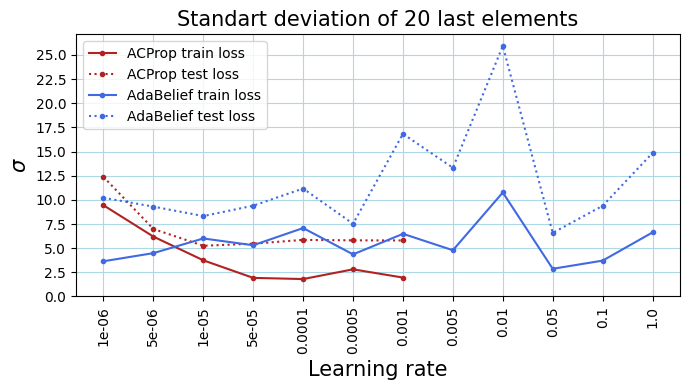

In [50]:
fig, ax = plt.subplots(figsize=(7,4))

ax.plot(acprop_train_loss[:, -20:].mean(axis=1), color='firebrick', label='ACProp train loss', marker='o', markersize=3)
ax.plot(acprop_test_loss[:, -20:].mean(axis=1), color='firebrick', ls=':', label='ACProp test loss', marker='o', markersize=3)

ax.plot(adabelief_train_loss[:, -20:].mean(axis=1), color='royalblue', label='AdaBelief train loss', marker='o', markersize=3)
ax.plot(adabelief_test_loss[:, -20:].mean(axis=1), color='royalblue', ls=':', label='AdaBelief test loss', marker='o', markersize=3)

ax.set_xticks(np.arange(learning_rate_grid.size))
ax.set_xticklabels(learning_rate_grid)
ax.tick_params(axis='x', rotation=90)
ax.grid(color='lightblue')
ax.set_ylabel(r'$\sigma$', fontsize=15)
ax.set_xlabel('Learning rate', fontsize=15)
ax.set_yticks(np.arange(0, 27.5, 2.5))
ax.set_title('Standart deviation of 20 last elements', fontsize=15)

ax.legend()
fig.tight_layout()
fig.savefig('images/std.png', dpi=300)